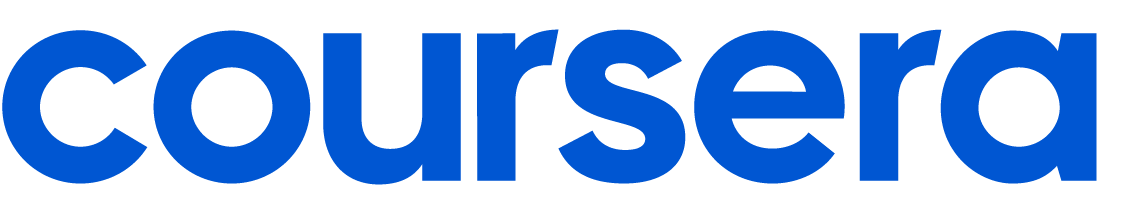

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [58]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [59]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
# Import any other packages you may want to use


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [61]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [62]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [63]:
train_df.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [64]:
test_df.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
dtype: int64

In [65]:
train_df.dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth        int64
Gender                       object
WatchlistSize                 int64
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                         int64
dtype: object

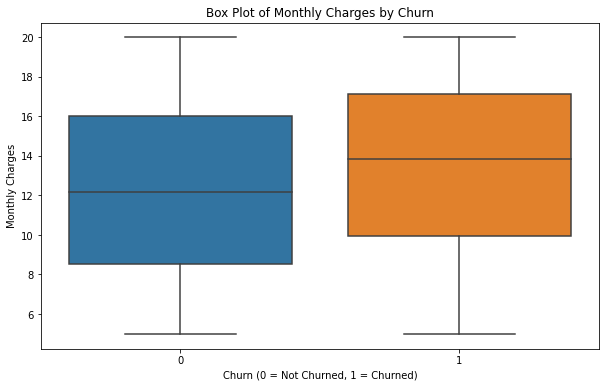

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=train_df)
plt.title('Box Plot of Monthly Charges by Churn')
plt.xlabel('Churn (0 = Not Churned, 1 = Churned)')
plt.ylabel('Monthly Charges')
plt.show()

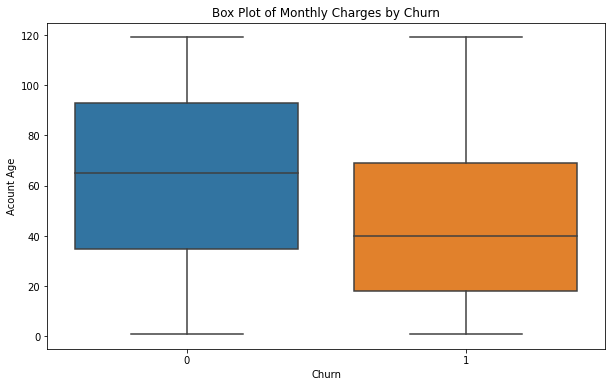

In [67]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='AccountAge', data=train_df)
plt.title('Box Plot of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Acount Age')
plt.show()

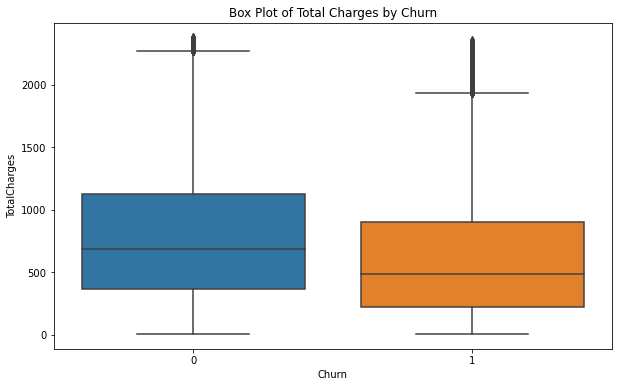

In [68]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='TotalCharges', data=train_df)
plt.title('Box Plot of Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('TotalCharges')
plt.show()

In [69]:
train_df['SubscriptionType'].value_counts()

Standard    81920
Basic       81050
Premium     80817
Name: SubscriptionType, dtype: int64

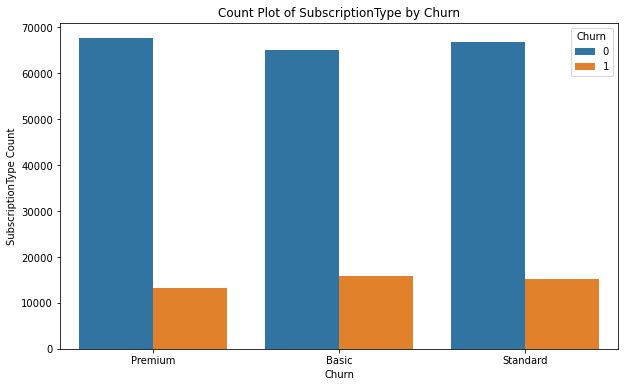

In [70]:
plt.figure(figsize=(10,6))
sns.countplot( x='SubscriptionType', hue='Churn', data=train_df, dodge=True)
plt.title('Count Plot of SubscriptionType by Churn')
plt.xlabel('Churn')
plt.ylabel('SubscriptionType Count')
plt.show()

In [71]:
train_df['SubscriptionType']=train_df['SubscriptionType'].map({'Premium':0, 'Basic':1, 'Standard':2})
train_df['SubscriptionType'].head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    2
8    2
9    2
Name: SubscriptionType, dtype: int64

In [72]:
test_df['SubscriptionType']=test_df['SubscriptionType'].map({'Premium':0, 'Basic':1, 'Standard':2})
test_df['SubscriptionType'].head(10)

0    0
1    1
2    2
3    2
4    2
5    1
6    2
7    1
8    2
9    2
Name: SubscriptionType, dtype: int64

In [73]:
train_df['PaymentMethod'].value_counts()

Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: PaymentMethod, dtype: int64

In [74]:
train_df.groupby(['Churn'])['PaymentMethod'].value_counts()

Churn  PaymentMethod   
0      Credit card         51039
       Bank transfer       49898
       Electronic check    49512
       Mailed check        49156
1      Electronic check    11801
       Mailed check        11597
       Bank transfer       10899
       Credit card          9885
Name: PaymentMethod, dtype: int64

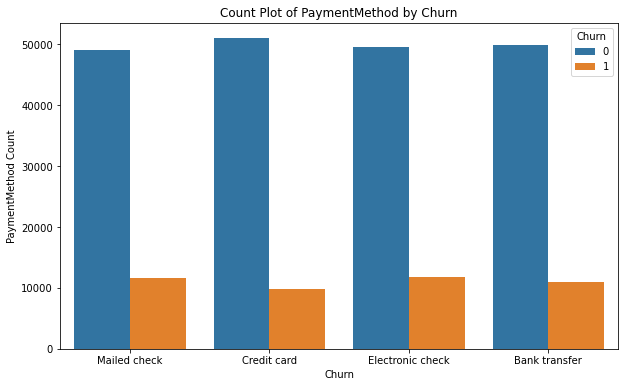

In [75]:
plt.figure(figsize=(10,6))
sns.countplot( x='PaymentMethod', hue='Churn', data=train_df, dodge=True)
plt.title('Count Plot of PaymentMethod by Churn')
plt.xlabel('Churn')
plt.ylabel('PaymentMethod Count')
plt.show()

In [76]:
train_df['PaymentMethod']=train_df['PaymentMethod'].map({'Mailed check':0, 'Credit card':1, 'Bank transfer':2, 'Electronic check':3})
train_df['PaymentMethod'].head(10)

0    0
1    1
2    0
3    3
4    3
5    0
6    2
7    3
8    2
9    2
Name: PaymentMethod, dtype: int64

In [77]:
test_df['PaymentMethod']=test_df['PaymentMethod'].map({'Mailed check':0, 'Credit card':1, 'Bank transfer':2, 'Electronic check':3})
test_df['PaymentMethod'].head(10)

0    0
1    3
2    2
3    3
4    1
5    3
6    1
7    3
8    3
9    1
Name: PaymentMethod, dtype: int64

In [78]:
train_df['PaperlessBilling'].value_counts()

No     121980
Yes    121807
Name: PaperlessBilling, dtype: int64

In [79]:
# We will drop PaperlessBilling columns
train_df.groupby(['PaperlessBilling'])['Churn'].value_counts()

PaperlessBilling  Churn
No                0        99830
                  1        22150
Yes               0        99775
                  1        22032
Name: Churn, dtype: int64

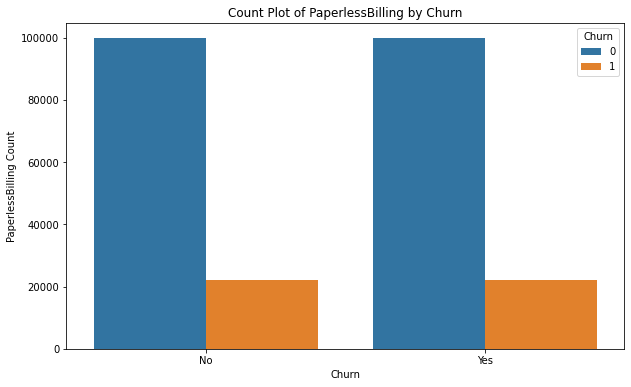

In [80]:
plt.figure(figsize=(10,6))
sns.countplot( x='PaperlessBilling', hue='Churn', data=train_df, dodge=True)
plt.title('Count Plot of PaperlessBilling by Churn')
plt.xlabel('Churn')
plt.ylabel('PaperlessBilling Count')
plt.show()

In [81]:
train_df['ContentType'].value_counts()

Both        81737
TV Shows    81145
Movies      80905
Name: ContentType, dtype: int64

In [82]:
#Wil drop ContentType column
train_df.groupby(['ContentType'])['Churn'].value_counts()

ContentType  Churn
Both         0        66332
             1        15405
Movies       0        66523
             1        14382
TV Shows     0        66750
             1        14395
Name: Churn, dtype: int64

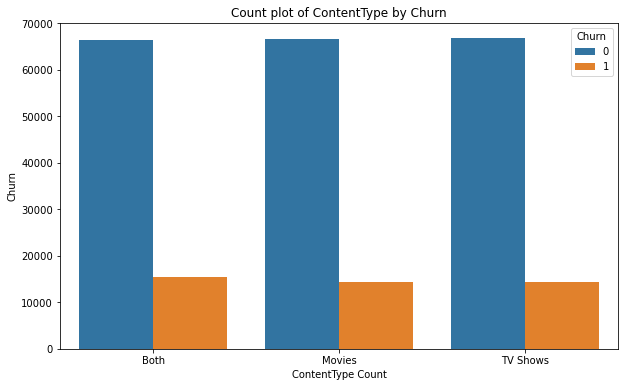

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(x='ContentType', hue='Churn',data=train_df)
plt.title('Count plot of ContentType by Churn')
plt.xlabel('ContentType Count')
plt.ylabel('Churn')
plt.show()

In [84]:
train_df['MultiDeviceAccess'].value_counts()

No     122035
Yes    121752
Name: MultiDeviceAccess, dtype: int64

In [85]:
#Wil drop MultiDeviceAccess colum
train_df.groupby(['MultiDeviceAccess'])['Churn'].value_counts()

MultiDeviceAccess  Churn
No                 0        99858
                   1        22177
Yes                0        99747
                   1        22005
Name: Churn, dtype: int64

In [86]:
train_df['DeviceRegistered'].value_counts()

Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: DeviceRegistered, dtype: int64

In [87]:
#Will drop DeviceRegistered column
train_df.groupby(['DeviceRegistered'])['Churn'].value_counts()

DeviceRegistered  Churn
Computer          0        50058
                  1        11089
Mobile            0        49805
                  1        11109
TV                0        49736
                  1        10847
Tablet            0        50006
                  1        11137
Name: Churn, dtype: int64

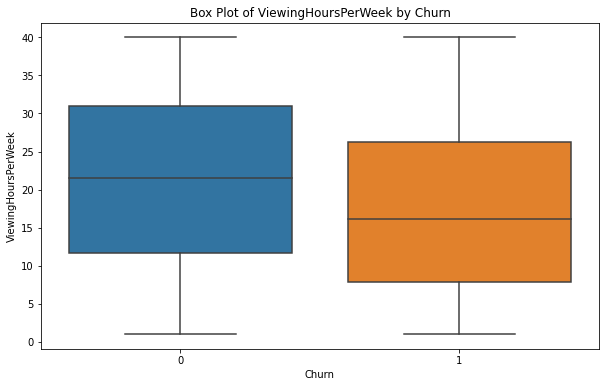

In [88]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='ViewingHoursPerWeek', data=train_df)
plt.title('Box Plot of ViewingHoursPerWeek by Churn')
plt.xlabel('Churn')
plt.ylabel('ViewingHoursPerWeek')
plt.show()

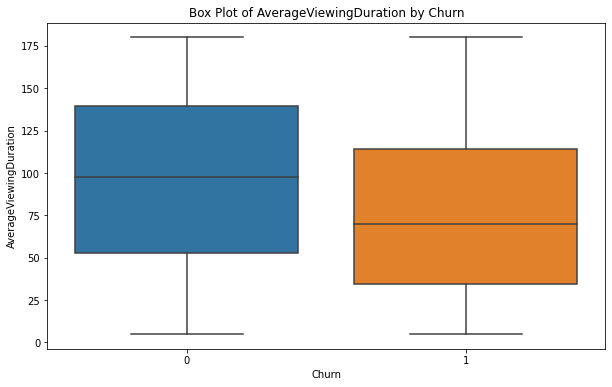

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='AverageViewingDuration', data=train_df )
plt.title('Box Plot of AverageViewingDuration by Churn')
plt.xlabel('Churn')
plt.ylabel('AverageViewingDuration')
plt.show()

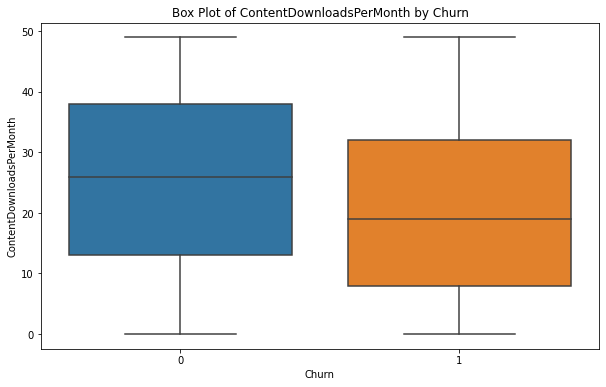

In [90]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='ContentDownloadsPerMonth', data=train_df )
plt.title('Box Plot of ContentDownloadsPerMonth by Churn')
plt.xlabel('Churn')
plt.ylabel('ContentDownloadsPerMonth')
plt.show()

In [91]:
train_df['GenrePreference'].value_counts()

Comedy     49060
Fantasy    48955
Drama      48744
Action     48690
Sci-Fi     48338
Name: GenrePreference, dtype: int64

In [92]:
train_df.groupby(['GenrePreference'])['Churn'].value_counts()

GenrePreference  Churn
Action           0        40614
                 1         8076
Comedy           0        39571
                 1         9489
Drama            0        40033
                 1         8711
Fantasy          0        40303
                 1         8652
Sci-Fi           0        39084
                 1         9254
Name: Churn, dtype: int64

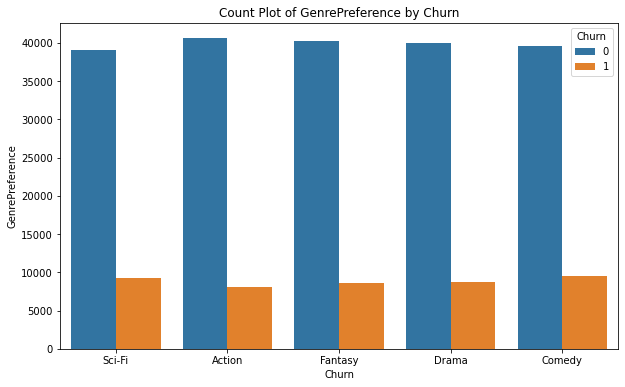

In [93]:
plt.figure(figsize=(10,6))
sns.countplot( x='GenrePreference', hue='Churn', data=train_df)
plt.title('Count Plot of GenrePreference by Churn')
plt.xlabel('Churn')
plt.ylabel('GenrePreference')
plt.show()

In [94]:
train_df['GenrePreference']=train_df['GenrePreference'].map({'Sci-Fi':0, 'Action':1, 'Fantasy':2, 'Drama':3, 'Comedy':4})
train_df['GenrePreference'].head(10)

0    0
1    1
2    2
3    3
4    4
5    4
6    1
7    2
8    2
9    4
Name: GenrePreference, dtype: int64

In [95]:
test_df['GenrePreference']=test_df['GenrePreference'].map({'Sci-Fi':0, 'Action':1, 'Fantasy':2, 'Drama':3, 'Comedy':4})
test_df['GenrePreference'].head(10)

0    4
1    1
2    0
3    4
4    3
5    4
6    0
7    2
8    2
9    0
Name: GenrePreference, dtype: int64

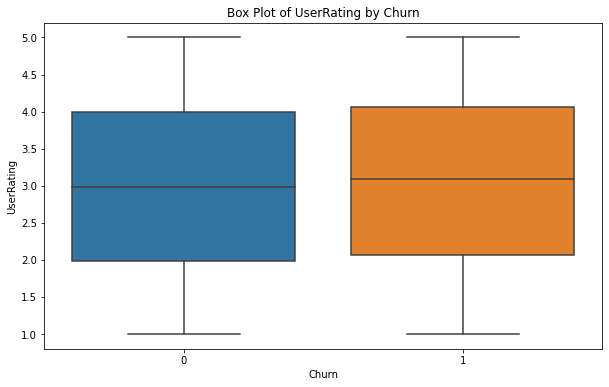

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='UserRating', data=train_df )
plt.title('Box Plot of UserRating by Churn')
plt.xlabel('Churn')
plt.ylabel('UserRating')
plt.show()

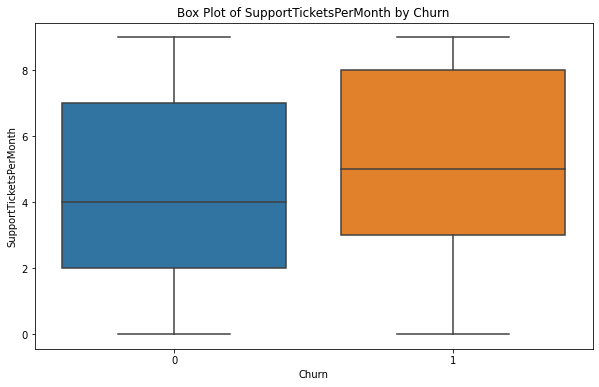

In [97]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='SupportTicketsPerMonth', data=train_df )
plt.title('Box Plot of SupportTicketsPerMonth by Churn')
plt.xlabel('Churn')
plt.ylabel('SupportTicketsPerMonth')
plt.show()

In [98]:
#will drop gender column
train_df.groupby(['Gender'])['Churn'].value_counts()

Gender  Churn
Female  0        100183
        1         21747
Male    0         99422
        1         22435
Name: Churn, dtype: int64

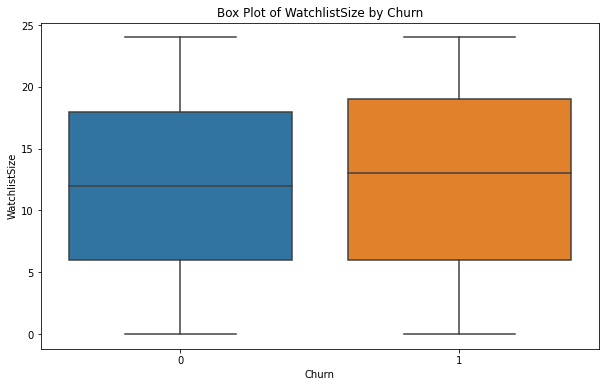

In [99]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='WatchlistSize', data=train_df )
plt.title('Box Plot of WatchlistSize by Churn')
plt.xlabel('Churn')
plt.ylabel('WatchlistSize')
plt.show()

In [100]:
#will drop ParentalControl column
train_df.groupby(['ParentalControl'])['Churn'].value_counts()

ParentalControl  Churn
No               0         99386
                 1         22316
Yes              0        100219
                 1         21866
Name: Churn, dtype: int64

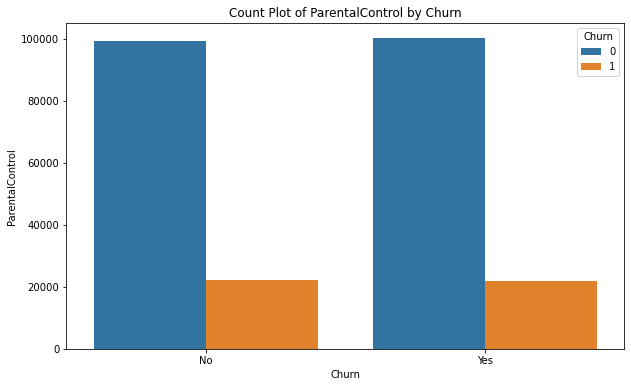

In [101]:
plt.figure(figsize=(10,6))
sns.countplot( x='ParentalControl', hue='Churn', data=train_df)
plt.title('Count Plot of ParentalControl by Churn')
plt.xlabel('Churn')
plt.ylabel('ParentalControl')
plt.show()

In [102]:
#will drop SubtitlesEnabled column
train_df.groupby(['SubtitlesEnabled'])['Churn'].value_counts()

SubtitlesEnabled  Churn
No                0         98987
                  1         22620
Yes               0        100618
                  1         21562
Name: Churn, dtype: int64

In [103]:
test_copy=test_df.copy()
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104480 entries, 0 to 104479
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                104480 non-null  int64  
 1   MonthlyCharges            104480 non-null  float64
 2   TotalCharges              104480 non-null  float64
 3   SubscriptionType          104480 non-null  int64  
 4   PaymentMethod             104480 non-null  int64  
 5   PaperlessBilling          104480 non-null  object 
 6   ContentType               104480 non-null  object 
 7   MultiDeviceAccess         104480 non-null  object 
 8   DeviceRegistered          104480 non-null  object 
 9   ViewingHoursPerWeek       104480 non-null  float64
 10  AverageViewingDuration    104480 non-null  float64
 11  ContentDownloadsPerMonth  104480 non-null  int64  
 12  GenrePreference           104480 non-null  int64  
 13  UserRating                104480 non-null  f

In [104]:
drop_col=['SubtitlesEnabled','ParentalControl','Gender', 'DeviceRegistered', 'MultiDeviceAccess', 'ContentType', 'PaperlessBilling', 'CustomerID']

In [105]:
train_df=train_df.drop(columns=drop_col)

In [106]:
test_df=test_df.drop(columns=drop_col)

In [107]:
train_df.dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType              int64
PaymentMethod                 int64
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference               int64
UserRating                  float64
SupportTicketsPerMonth        int64
WatchlistSize                 int64
Churn                         int64
dtype: object

In [108]:
test_df.dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType              int64
PaymentMethod                 int64
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference               int64
UserRating                  float64
SupportTicketsPerMonth        int64
WatchlistSize                 int64
dtype: object

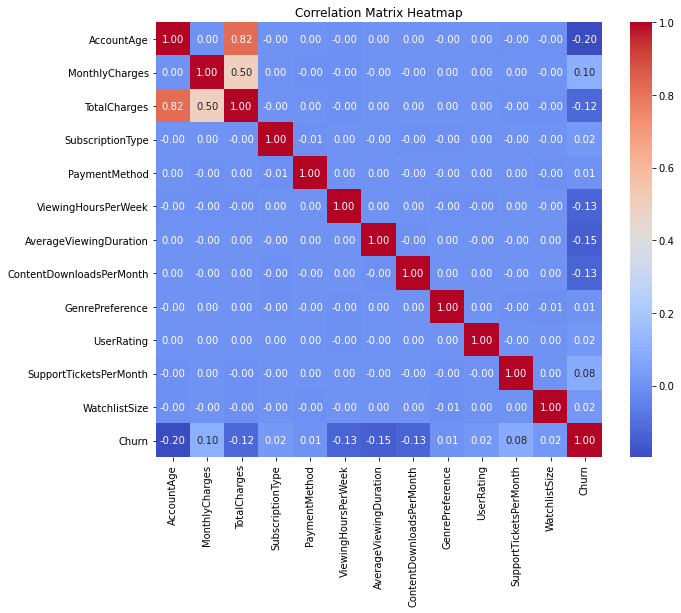

In [109]:
correlation_matrix = train_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [110]:
X = train_df.drop(columns=['Churn'])
y = train_df['Churn']

In [111]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (170650, 12)
Testing set size: (73137, 12)


In [113]:
!pip install xgboost

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [114]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [115]:


# Assuming data is already prepared as described previously
# X_train, X_test, y_train, y_test

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier()
}

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy
    print(f"{name} - Accuracy: {accuracy}")
    print(classification_report(y_test, predictions))

# Print the best performing model
best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name} with Accuracy: {results[best_model_name]}")

Logistic Regression - Accuracy: 0.8242749907707453
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     59923
           1       0.57      0.11      0.19     13214

    accuracy                           0.82     73137
   macro avg       0.70      0.55      0.54     73137
weighted avg       0.79      0.82      0.77     73137

Decision Tree - Accuracy: 0.7280583015436783
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     59923
           1       0.27      0.29      0.28     13214

    accuracy                           0.73     73137
   macro avg       0.55      0.56      0.56     73137
weighted avg       0.74      0.73      0.73     73137

Random Forest - Accuracy: 0.8214310130303403
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     59923
           1       0.53      0.10      0.17     13214

    accuracy                           0.

In [117]:
model=LogisticRegression()
model.fit(X, y)
prediction=model.predict(test_df)
prediction_df=pd.DataFrame({'CustomerID':test_copy.CustomerID, 'predicted_probability':prediction})

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [118]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [119]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [120]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [121]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [122]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!